# Cost and Profitability Solution for WoW Foods Delivery Service

**WoW Foods Delivery Service** is an online food delivery service that allows customers buy food from their favorites restaurants and have their food orders delivered to their desired location. 
**Wow Foods** generates revenue through commission by percentage on each customer's order value. 

However, there are various expenses WoW Foods incures in delivery orders to customers. These expenses as delivery fee, payment processing fee and charges for refunds/ chargebacks. 
For incentives, WoW Foods also gives discounts to users; for using the app, new user and promo.

## Importing  Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns

## Importing the dataset, a csv file

In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\Bluetooth files\food_orders_new_delhi.csv")
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


## Checking out the data

In [ ]:
# CHECKING FOR DUPLICATES
df.duplicated().sum()


In [ ]:
# CHECKING OUT FOR INDIVIDUAL COLUMNS
df.columns

In [ ]:
df['Discounts and Offers'].unique()

In [ ]:
df['Payment Method'].unique()

In [ ]:
df.describe()

In [ ]:
# CHECKING FOR NA VALUES

df.isna().sum()

#### Using a python module called sweetviz

In [ ]:
# QUICK DATA EXPLORATION WITH SWEETVIZ MODULE

report = sv.analyze(df)

report.show_html('sweet_viz_report.html')

In [ ]:
df.shape

### Data Cleanning Starts

In [ ]:
df.info()

In [5]:
df.dropna(inplace=True)

#### Working on Delivery and Order dates and times

In [7]:
# CONVERTING TO DATE TYPES
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])
df['Order Date and Time'] =pd.to_datetime(df['Order Date and Time'])

In [9]:
# CALCULATING THE DIFFERENCIES IN DELIVERY

df['Del/Ord Diff'] = df['Delivery Date and Time'] - df['Order Date and Time']
df['Time Diff'] = df['Del/Ord Diff'].astype('str').str.split().str[2]
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Del/Ord Diff,Time Diff
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,0 days 01:28:00,01:28:00
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,0 days 00:35:00,00:35:00
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,0 days 00:58:00,00:58:00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0 days 01:29:00,01:29:00
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,0 days 00:51:00,00:51:00


In [11]:
# WORKING ON DISCOUNT VALUE

df['Discount'] = df['Discounts and Offers'].str.split().str[0]


##  Calculating the discount rate

In [13]:
df['Discount'] = df['Discount'].astype('str').str.split('%').str[0].astype('float')
df['Discounted Price'] = df['Order Value'] * (df['Discount']/100)
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Del/Ord Diff,Time Diff,Discount,Discounted Price
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,0 days 01:28:00,01:28:00,5.0,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,0 days 00:35:00,00:35:00,10.0,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,0 days 00:58:00,00:58:00,15.0,140.55
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0 days 01:29:00,01:29:00,50.0,996.00
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,0 days 00:51:00,00:51:00,10.0,43.90


In [144]:
# CALCULATING TOTAL COST FOR EACH FOOD DELIVERY

df['Total Cost'] = df['Delivery Fee'] + df['Payment Processing Fee'] 
+ df['Discounted Price'] + df['Refunds/Chargebacks']


0       95.70
1       98.60
2      140.55
4      996.00
5      193.90
        ...  
993    539.00
994     25.75
995     91.25
998    212.10
999    348.55
Length: 815, dtype: float64

In [17]:
# CALCULATING TOTAL PROFIT

df['Returns'] = df['Commission Fee'] - df['Total Cost']
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Del/Ord Diff,Time Diff,Discount,Discounted Price,Total Cost,Returns
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,0 days 01:28:00,01:28:00,5.0,95.70,142.70,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,0 days 00:35:00,00:35:00,10.0,98.60,161.60,36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,0 days 00:58:00,00:58:00,15.0,140.55,215.55,-20.55
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0 days 01:29:00,01:29:00,50.0,996.00,1076.00,-946.00
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,0 days 00:51:00,00:51:00,10.0,43.90,240.90,-148.90


In [19]:
# FINDING CORRELATION BETWEEN PROFIT AND DISCOUNT 

dis_re_corr = df[['Returns','Discount']]
corr =dis_re_corr.corr()
corr

,Returns,Discount
Returns,1.000000,-0.776615
Discount,-0.776615,1.000000


- There is a very strong negative correlation of -0.78 between discount and profit. Increase in discount connotes reduction in profit and vice-versa

In [140]:
# PLOTTING THE DISCOUNT GIVEN BY PERCENTAGE

discount_percentage =(df['Customer ID'].groupby(df['Discount']).count()
                     ) / df['Customer ID'].count() * 100
disc_pct = discount_percentage.reset_index()
disc_pct['Discount'] =disc_pct['Discount'].astype('str')
disc_pct
disc_pct['Discount'] = disc_pct['Discount'].replace({'5.0':'5%', 
                                                     '10.0':'10%', '50.0':'50%', '15.0':'15%'})
disc_pct

,Discount,Customer ID
0,5%,22.453988
1,10%,28.588957
2,15%,24.294479
3,50%,24.662577


- Calculating the discount by percentage, the top percentages (50% and 15%) are very close to the mean (25) of the distribution

In [23]:
discount_percentage.mean()

25.0

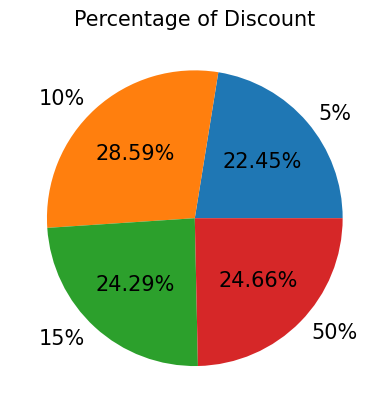

In [125]:
# PLOTTING A PIE CHART FOR FOR DISCOUNT RATE

disc_pct.plot(kind='pie', y ='Customer ID', labels=disc_pct['Discount'],
              autopct ='%1.2f%%', fontsize=15)
plt.title('Percentage of Discount', fontsize=15)
plt.ylabel({}).set_visible(False)
plt.legend([ ]).set_visible(False)
plt.show()

In [25]:
df[df['Refunds/Chargebacks']>0][['Refunds/Chargebacks','Discount', 'Time Diff', 'Payment Method']]


,Refunds/Chargebacks,Discount,Time Diff,Payment Method
5,150,10.0,00:51:00,Cash on Delivery
6,50,5.0,00:53:00,Digital Wallet
13,50,15.0,01:40:00,Digital Wallet
19,100,5.0,00:50:00,Cash on Delivery
27,100,5.0,01:31:00,Cash on Delivery
...,...,...,...,...
977,50,5.0,01:17:00,Credit Card
978,100,15.0,01:36:00,Digital Wallet
985,150,15.0,01:47:00,Credit Card
995,50,5.0,00:42:00,Digital Wallet


In [123]:
df[df['Refunds/Chargebacks']>0
].groupby([df['Payment Method'],df['Refunds/Chargebacks']]).count()[
'Customer ID'].reset_index().sort_values(
    by=['Customer ID'], ascending =False)


,Payment Method,Refunds/Chargebacks,Customer ID
1,Cash on Delivery,100,37
4,Credit Card,100,27
2,Cash on Delivery,150,26
6,Digital Wallet,50,26
7,Digital Wallet,100,26
3,Credit Card,50,24
5,Credit Card,150,24
0,Cash on Delivery,50,22
8,Digital Wallet,150,13


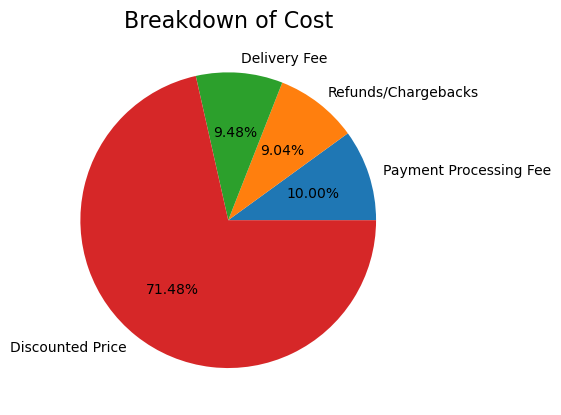

In [29]:
# PLOTTING TO THE BREAKDOWN OF COST

cost = df[['Payment Processing Fee','Refunds/Chargebacks','Delivery Fee','Discounted Price']].sum()
cost
cost.plot(kind ='pie', autopct='%1.2f%%')
plt.title('Breakdown of Cost', fontsize=16)
plt.show()


- Huge part of the cost was from discounts given on orders and delivery. Discounts was 66.76% of the total cost. To minimize total cost, it is necessary to examine discount cost.

In [31]:
dfy =df[['Payment Processing Fee','Refunds/Chargebacks','Delivery Fee','Discounted Price']].sum()
dfy

Payment Processing Fee     24374.00
Refunds/Chargebacks        22050.00
Delivery Fee               23110.00
Discounted Price          174257.85
dtype: float64

In [33]:
payment = df[df['Refunds/Chargebacks']>0
].groupby([df['Payment Method'],df['Refunds/Chargebacks']]).count()['Customer ID'].reset_index()
payment_method= df['Customer ID'].groupby(df['Payment Method']).count()
payment_ref = df['Customer ID'].groupby(df['Refunds/Chargebacks']).count()
payment_ref

Refunds/Chargebacks
0      590
50      72
100     90
150     63
Name: Customer ID, dtype: int64

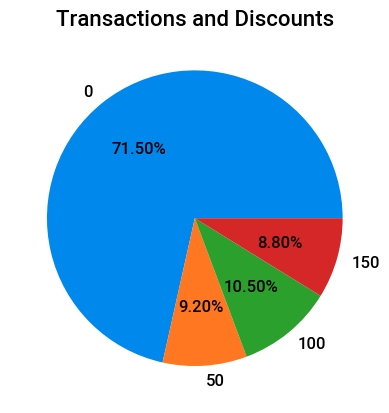

In [163]:
payment_ref.plot(kind= 'pie', y ='Customer ID', autopct='%1.2f%%' , fontsize =12)
plt.ylabel({}).set_visible(False)
plt.title('Transactions and Discounts', fontsize=16)
plt.show()

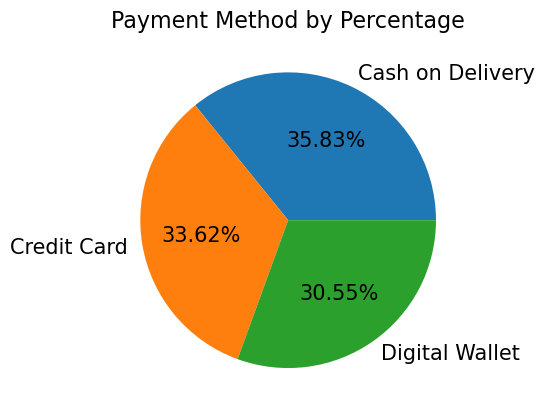

In [35]:
payment_method.plot(kind='pie', autopct ='%1.2f%%', fontsize =15)
plt.ylabel({}).set_visible(False)
plt.title('Payment Method by Percentage', fontsize=16)
plt.show()

In [119]:
df[(df['Payment Method']=='Cash on Delivery') & (df['Refunds/Chargebacks']>0)][[
    'Payment Method','Refunds/Chargebacks']].count()

Payment Method         85
Refunds/Chargebacks    85
dtype: int64

In [39]:
max_time =df['Time Diff'].max()
min_time = df['Time Diff'].min()
min_max_time = 'Minimum time = ' + min_time +', Maximum time = ' + max_time
print(min_max_time)

Minimum time = 00:30:00, Maximum time = 01:59:00


In [41]:
df[df['Time Diff']==max_time][['Customer ID','Refunds/Chargebacks','Time Diff']]

,Customer ID,Refunds/Chargebacks,Time Diff
195,C7546,0,01:59:00
218,C6423,0,01:59:00
285,C3975,0,01:59:00
396,C7665,0,01:59:00
875,C9669,100,01:59:00
943,C4507,0,01:59:00


- There is no correlation between high delivery time and chargebacks

In [43]:
time_mode =df['Time Diff'].mode()
time_mode

0    00:44:00
Name: Time Diff, dtype: object

In [45]:
df[df['Time Diff']== min_time][['Customer ID', 'Refunds/Chargebacks', 'Time Diff']]

,Customer ID,Refunds/Chargebacks,Time Diff
160,C8280,0,00:30:00
173,C6791,0,00:30:00
205,C7694,0,00:30:00
423,C4373,100,00:30:00
681,C7269,0,00:30:00
716,C3878,0,00:30:00
964,C7320,0,00:30:00


In [47]:
df[df['Time Diff'] == '00:44:00' ][['Customer ID','Refunds/Chargebacks', 'Time Diff']]

,Customer ID,Refunds/Chargebacks,Time Diff
40,C8513,150,00:44:00
66,C7863,50,00:44:00
71,C5859,0,00:44:00
74,C9684,0,00:44:00
78,C1064,0,00:44:00
122,C2757,0,00:44:00
152,C4304,0,00:44:00
171,C6172,0,00:44:00
193,C3811,0,00:44:00
234,C6592,0,00:44:00


 - There is a clear indication that the delivery time has no correlation with Refunds/ chargebacks, having compared the minimum, maximum and mode time differences in order time and delivery time.

## Calculating the Profit and Loss for the Delivery

In [49]:
df['Returns']= df['Returns'].astype('float64')
total_profit =df[df['Returns']>0]['Returns'].sum()
profit =df[df['Returns']>0]['Returns'].count()
total_loss =df[df['Returns']<0]['Returns'].sum()
loss =df[df['Returns']<0]['Returns'].count()
final = total_profit -total_loss * -1
print('Profit is',total_profit,'and a loss of',total_loss, '\nThereby totalling a loss of', final)

Profit is 8831.2 and a loss of -148825.05 
Thereby totalling a loss of -139993.84999999998


In [194]:
# FINDING THE MEAN VALUE OF COMMISSION FEE BY PERCENTAGE

commission_amt =(df['Commission Fee'] *100) / df['Order Value']
mean_comm = commission_amt.mean()
mean_comm
min_comm =commission_amt.min()
min_comm

max_comm = commission_amt.max()
print(max_comm)
print(commission_amt.mode())

df[df['commission_amt']==20.0][['Commission Fee','Order Value','commission_amt','Discount']].count()

169.0909090909091
0    20.0
dtype: float64


Commission Fee    4
Order Value       4
commission_amt    4
Discount          4
dtype: int64

In [79]:
p_count =df[df['Returns']>0]['Customer ID'].count()
l_count = df[df['Returns']<0]['Customer ID'].count()
even =df[df['Returns']==0]['Customer ID'].count()
print('No. of profit delivery is',p_count,
      'while no. of Loss delivery is',l_count,'with',even,'even returns')

No. of profit delivery is 192 while no. of Loss delivery is 622 with 1 even returns


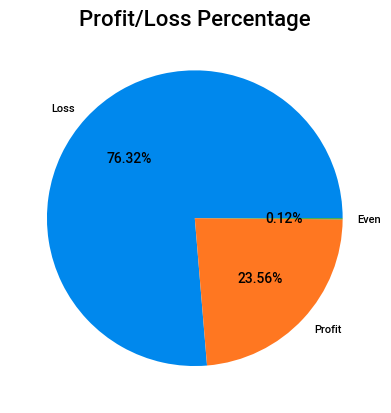

In [143]:
# Percentage of number of profit and loss transactions\
p_p = p_count/815 *100
l_p = l_count/815 *100
ev = even/815 *100
p=pd.DataFrame([l_p,p_p,ev],index =['Loss','Profit','Even'] )

p.plot(kind ='pie', y=0, autopct ='%1.2f%%')
plt.ylabel({}).set_visible(False)

plt.legend({}).set_visible(False)
plt.title('Profit/Loss Percentage',fontsize=16)
plt.show()


## Calculating the average commission % and discount % for Profit generation transactions


In [105]:
profitable = df[df['Returns']>0][['Customer ID','Order Value','Commission Fee',
                                  'Delivery Fee','Payment Processing Fee',
                                  'Discount','Discounted Price','Refunds/Chargebacks',
                                  'Returns']]
profitable
profitable['commission %'] = profitable['Commission Fee']/ profitable['Order Value'] * 100
profitable['discont %'] = profitable['Discounted Price']/profitable['Order Value'] * 100
profitable
com =profitable['commission %'].mean()
dis = profitable['discont %'].mean()
print('New commission % =',com,'\nNew discount % =',dis)

New commission % = 38.12239053347722 
New discount % = 9.84375


In [107]:
new_com = 38
new_dis = 10

In [109]:
profitable['new_com_amt']= (new_com/100) * profitable['Order Value']
profitable['new_dis_amt'] = (new_dis/100) * profitable['Order Value']
profitable.head()

,Customer ID,Order Value,Commission Fee,Delivery Fee,Payment Processing Fee,Discount,Discounted Price,Refunds/Chargebacks,Returns,commission %,discont %,new_com_amt,new_dis_amt
0,C8270,1914,150,0,47,5.0,95.70,0,7.30,7.836991,5.0,727.32,191.4
1,C1860,986,198,40,23,10.0,98.60,0,36.40,20.081136,10.0,374.68,98.6
6,C1466,303,144,30,12,5.0,15.15,50,36.85,47.524752,5.0,115.14,30.3
7,C5426,260,55,0,19,10.0,26.00,0,10.00,21.153846,10.0,98.80,26.0
9,C9322,491,189,40,10,10.0,49.10,0,89.90,38.492872,10.0,186.58,49.1


In [113]:
profitable['new_total_cost']= profitable['new_dis_amt']+ profitable['Payment Processing Fee']
+profitable['Refunds/Chargebacks']
+profitable['Delivery Fee']
profitable['New Returns'] = profitable['new_com_amt'] - profitable['new_total_cost']
profitable.head()

,Customer ID,Order Value,Commission Fee,Delivery Fee,Payment Processing Fee,Discount,Discounted Price,Refunds/Chargebacks,Returns,commission %,discont %,new_com_amt,new_dis_amt,new_total_cost,New Returns
0,C8270,1914,150,0,47,5.0,95.70,0,7.30,7.836991,5.0,727.32,191.4,238.4,488.92
1,C1860,986,198,40,23,10.0,98.60,0,36.40,20.081136,10.0,374.68,98.6,121.6,253.08
6,C1466,303,144,30,12,5.0,15.15,50,36.85,47.524752,5.0,115.14,30.3,42.3,72.84
7,C5426,260,55,0,19,10.0,26.00,0,10.00,21.153846,10.0,98.80,26.0,45.0,53.80
9,C9322,491,189,40,10,10.0,49.10,0,89.90,38.492872,10.0,186.58,49.1,59.1,127.48


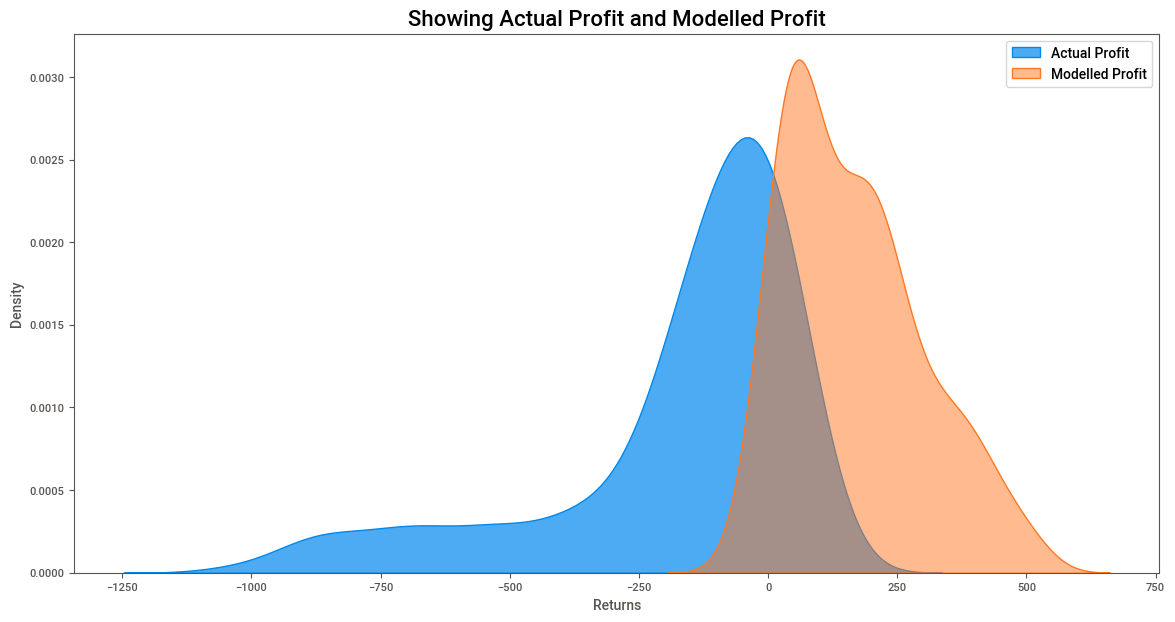

In [87]:
plt.figure(figsize=(14,7))
sns.kdeplot(data =df['Returns'], label='Actual Profit', fill=True, alpha =0.7)
sns.kdeplot(data = profitable['New Returns'], label='Modelled Profit', fill= True, alpha=0.5)
plt.legend()
plt.title('Showing Actual Profit and Modelled Profit', fontsize =16)
plt.show()